# Twitter Sentiment Analysis

## Data Loading

In [ ]:
# Setup for kaggle API

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading dataset via Kaggle

!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 96% 78.0M/80.9M [00:02<00:00, 44.5MB/s]
100% 80.9M/80.9M [00:02<00:00, 29.9MB/s]


In [ ]:
# Extracting data from ZipFile

import zipfile
zipfile_ref = zipfile.ZipFile('/content/sentiment140.zip','r')
zipfile_ref.extractall('/content')
zipfile_ref.close()

## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'latin',header=None)

## Exploratory Data Analysis (EDA)

In [ ]:
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.size

9600000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.describe()

,0,1
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Adding Column name as dataframe doesnt have any column name

df.columns = ['Sentiment', 'Id', 'Date', 'Query', 'User_Id', 'Text']

In [ ]:
df['User_Id'].value_counts().head(10)

,count
User_Id,
lost_dog,549
webwoke,345
tweetpet,310
SallytheShizzle,281
VioletsCRUK,279
mcraddictal,276
tsarnick,248
what_bugs_u,246
Karen230683,238


In [ ]:
df['Sentiment'].value_counts().head()

,count
Sentiment,
0,800000
4,800000


In [ ]:
# Checking the longest and shortest Text

df['length'] = df['Text'].apply(len)

longest_row = df.loc[df['length'].idxmax()]
shortest_row = df.loc[df['length'].idxmin()]

print("Longest row:")
print(longest_row['Text'])
print("\nShortest row:")
print(shortest_row['Text'])

Longest row:
@catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹à¸à¸¹à¸à¸?à¸¸à¹à¸£à¸°(à¸ªà¸±à¸ªà¹+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹à¸à¹à¹?à¸à¸à¸à¸°à¸à¸­à¸à¸µà¸¡à¸´à¹à¸?à¸°à¸«à¸§à¸(à¸à¸à¸²à¸à¹à¸à¸´à¸à¹?à¸?à¸¢à¸±à¸à¹à¸à¸¢à¹à¸«à¹à¹à¸¡à¹à¹à¸à¹à¹à¸«à¸£à¸­.à¹?à¸à¹à¸à¹à¸²à¸à¹à¸«à¸­à¸°à¸£à¸²à¸¢à¸à¸±à¹à¸à¹à¸à¸²à¹à¸¡à¹à¸­à¸°à¸?à¸§à¹à¸²à¸à¸¥à¸²à¹?à¸¡à¸§à¹à¸¢à¸­à¸° = 

Shortest row:
 just 


## Data Visualization

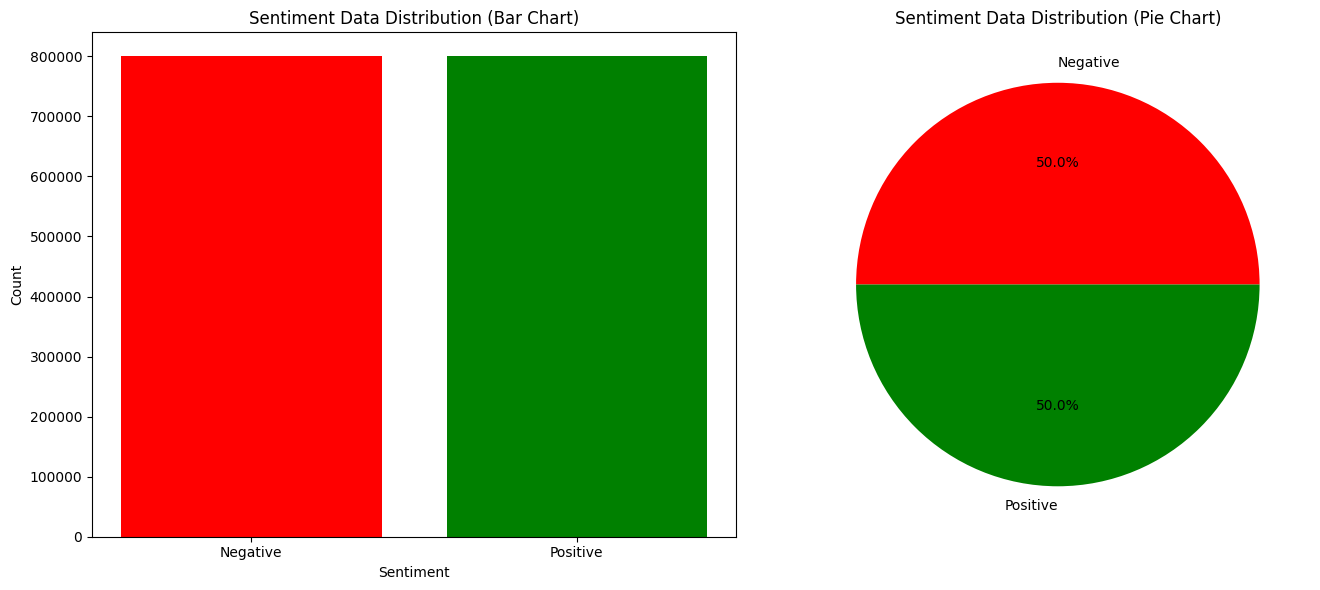

In [ ]:
sentiment_labels = {0: 'Negative', 4: 'Positive'}
df['Sentiment_Labeled'] = df['Sentiment'].map(sentiment_labels)
val_count = df['Sentiment_Labeled'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(val_count.index, val_count.values, color=['red', 'green'])
plt.title("Sentiment Data Distribution (Bar Chart)")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.pie(val_count.values, labels=val_count.index, colors=['red', 'green'], autopct='%1.1f%%')
plt.title("Sentiment Data Distribution (Pie Chart)")

plt.tight_layout()
plt.show()

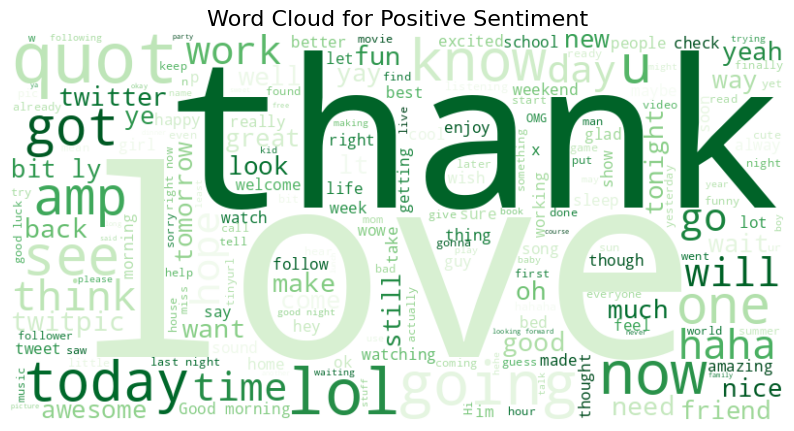

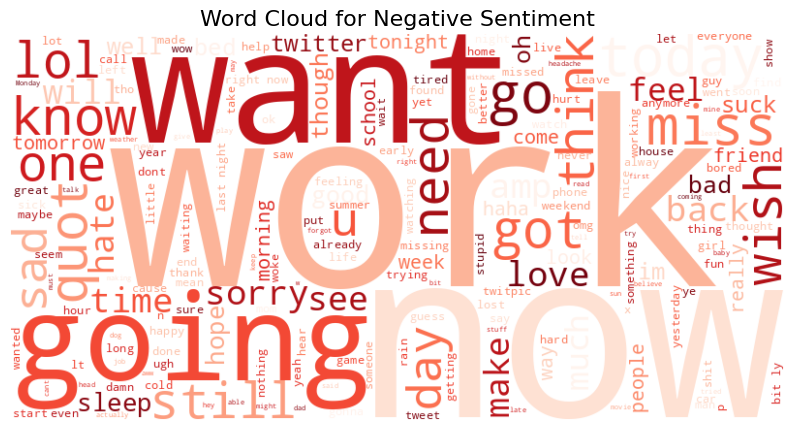

In [ ]:
# Plotting top 10 words used in positive & Negative sentiment without data cleaning

from wordcloud import WordCloud

# Positive Sentiment
positive_text = " ".join(df[df['Sentiment'] == 4]['Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

# Negative Sentiment
negative_text = " ".join(df[df['Sentiment'] == 0]['Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

## Data Cleaning

In [ ]:
# Removing Html Tags and Url Using Regex

import re

def remove_html(Text):
  clean_text = re.sub(r'<.*?>', '', Text)
  return clean_text

def remove_url(Text):
  clean_text = re.sub(r'http\S+', '', Text)
  return clean_text

In [ ]:
# Converting Text to Lowercase

def convert_to_lowercase(Text):
    return Text.lower()

In [ ]:
# Replacing Chat Words

def replace_chat_words(Text):
    chat_words = {
        "BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"
    }
    for word, expanded_form in chat_words.items():
        Text = Text.replace(word, expanded_form)
    return Text

In [ ]:
# Removing Punctuation and Stop Words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string,time
string.punctuation

def remove_punctuation(Text):
    clean_text = ''.join(ch for ch in Text if ch not in string.punctuation)
    return clean_text

def remove_stopwords(Text):
    stop_words = set(stopwords.words('english'))
    words = Text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing Witespace and Special Chararcters

def remove_whitespace(text):
    return text.strip()

def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

In [ ]:
# Combing all cleaned function to one dataframe

def preprocess_text(Text):
    text = remove_html(Text)
    text = remove_url(Text)
    text = convert_to_lowercase(Text)
    text = replace_chat_words(Text)
    text = remove_punctuation(Text)
    text = remove_stopwords(Text)
    text = remove_whitespace(Text)
    text = remove_special_characters(Text)
    return text

df['Text'] = df['Text'].apply(preprocess_text)

In [ ]:
df.head(5)

,Sentiment,Id,Date,Query,User_Id,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww thats a b...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times for the ball Manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...


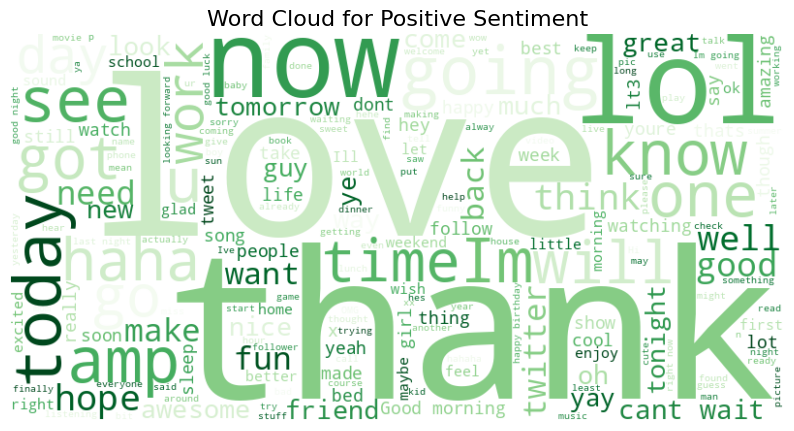

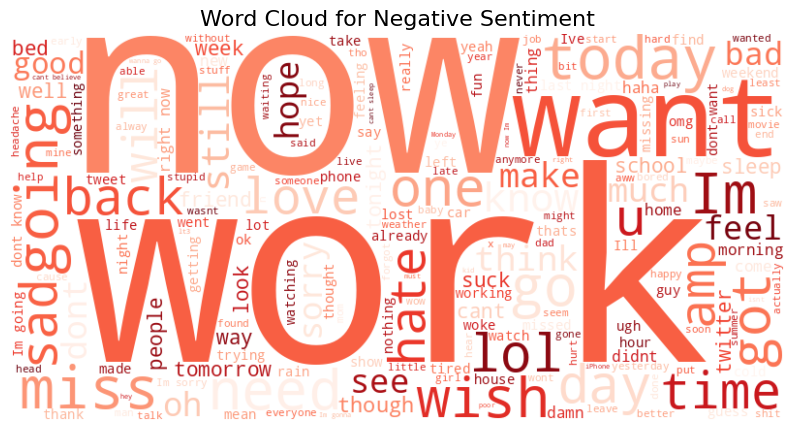

In [ ]:
# Plotting top 10 words used in positive & Negative sentiment after data cleaning

from wordcloud import WordCloud

# Positive Sentiment
positive_text = " ".join(df[df['Sentiment'] == 4]['Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

# Negative Sentiment
negative_text = " ".join(df[df['Sentiment'] == 0]['Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

## Data Preprocessing

In [ ]:
# Handling Contractions

import contractions
df['Text'] = df['Text'].apply(lambda x: contractions.fix(x))

In [ ]:
# Tokenization

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['tokens'] = df['Text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Lemmatization

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Handling Emoji's

import emoji
df['Text'] = df['Text'].apply(lambda x: emoji.demojize(x))

In [ ]:
# Handling Hashtags

df['hashtags'] = df['Text'].apply(lambda x: re.findall(r'#\w+', x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r'#\w+', '', x))

In [ ]:
# Handling Mentions and Username

df['Text'] = df['Text'].apply(lambda x: re.sub(r'@\w+', '<USER>', x))

In [ ]:
df.head(5)

,Sentiment,Id,Date,Query,User_Id,Text,tokens,hashtags
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl Awww that is a...,"[switchfoot, httptwitpiccom2y1zl, Awww, that, ...",[]
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cannot update his Facebook by...,"[is, upset, that, he, can, not, update, his, F...",[]
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times for the ball Manag...,"[Kenichan, I, dived, many, time, for, the, bal...",[]
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, ...",[]
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all i a...,"[nationwideclass, no, it, not, behaving, at, a...",[]


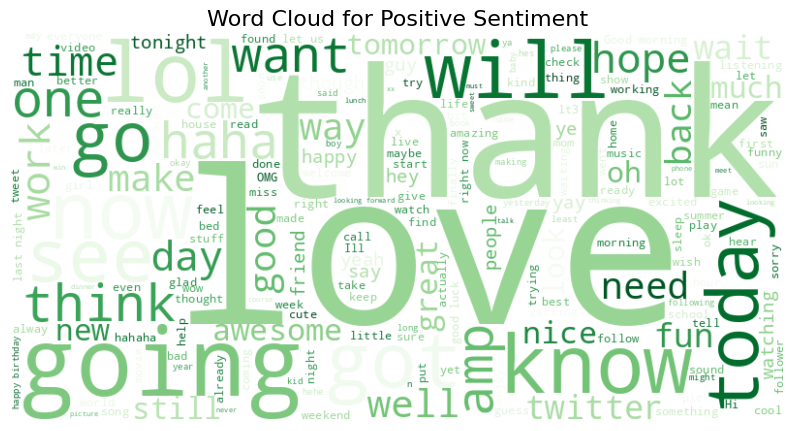

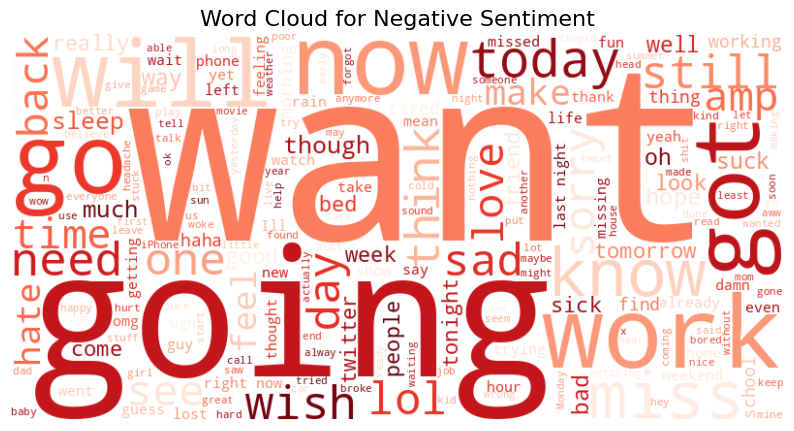

In [ ]:
# Plotting top 10 words used in positive & Negative sentiment after data preprocessing

from wordcloud import WordCloud

# Positive Sentiment
positive_text = " ".join(df[df['Sentiment'] == 4]['Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

# Negative Sentiment
negative_text = " ".join(df[df['Sentiment'] == 0]['Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

In [ ]:
df['Sentiment'] = df['Sentiment'].replace({4: 1, 0: 0})

## Model Building

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Text'], df['Sentiment'], test_size=0.2, random_state=42
)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

train_dataset = train_dataset.batch(16)
test_dataset = test_dataset.batch(16)

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 labels: Negative, Positive


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=3
)

In [ ]:
predictions = model.predict(test_dataset)
predicted_labels = predictions.logits.argmax(axis=-1)

# Classification report
print(classification_report(test_labels, predicted_labels))